# NewsMood

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

from pprint import pprint

%matplotlib inline

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#from config import (consumer_key, consumer_secret,
#                    access_token, access_token_secret)

# Twitter API Keys
consumer_key = "lQDyO9LHsHV7rw12KbBGP2H4S"
consumer_secret = "SrjdhJcNqJUsnMckBdp9vICDSXS8udXvEJr1iZQKKgMmyp4rsS"
access_token = "1007989024773074944-XZqI1XqtOjXdGDZlEMlftuNkRQbCVe"
access_token_secret = "58vmGsdNdKv7dXmc1NfMs7VfnbGarNgelr4IGnQf6bLjj"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
def getNewsSentiment(search='@bbc', tweet_count=1):
    #print(f"getNewsSentiment, {search} {tweet_count}")
    api = tweepy.API(auth)
    # Variables for holding sentiments
    #tweet_source_list = []
    sentiment_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []    
    
    count = 0
        
    for result in tweepy.Cursor(api.user_timeline, search).items(tweet_count):
        sentiment = analyzer.polarity_scores(result._json['text'])
        #pprint(result._json)
        #tweet_source_list.append(result._json['user']['name'])
        sentiment_list.append(result._json['text'])
        compound_list.append(sentiment['compound'])
        positive_list.append(sentiment['pos'])
        negative_list.append(sentiment['neg'])
        neutral_list.append(sentiment['neu'])
        tweets_ago.append(count)
        count += 1
    
    return pd.DataFrame({'Tweet Source':search,
                 'Tweet':sentiment_list,
                 'Compound':compound_list,
                 'Positive':positive_list, 
                 'Negative':negative_list, 
                 'Neutral':neutral_list,
                 'Tweets Ago':tweets_ago})

In [3]:
# Target Search Term
news_stations = ("@BBC", "@CBS", "@CNN", "@Fox", "@nytimes")


In [4]:
getNewsSentiment("@nytimes", tweet_count=2)

,Tweet Source,Tweet,Compound,Positive,Negative,Neutral,Tweets Ago
0,@nytimes,"Indonesia Ferry Toll Soars, With 192 Believed ...",-0.6486,0.0,0.35,0.65,0
1,@nytimes,"""You call me Mr. President of the Republic or ...",0.0000,0.0,0.00,1.00,1


In [5]:
tweet_count = 100
station_feedbacks = []
for station in news_stations:
    #print(station)
    station_feedbacks.append(getNewsSentiment(station, tweet_count))
    #print(df)
    #station_feedback_df = df = pd.DataFrame.append(station_feedback_df, df, ignore_index=True)

len(station_feedbacks)

5

In [6]:
count = len(station_feedbacks)
merged_df = pd.DataFrame()
for i in range(count):
    merged_df = pd.DataFrame.append(merged_df, station_feedbacks[i],ignore_index=True)

## Saving the Sentiments into a csv file

In [7]:
#Saving the csv
media_sentiment_filename = f"NewsMood_{str(time.strftime('%m-%d-%y'))}_Sentiments.csv"
merged_df.to_csv(media_sentiment_filename)

In [8]:
station_feedbacks[4].head()

,Tweet Source,Tweet,Compound,Positive,Negative,Neutral,Tweets Ago
0,@nytimes,"Indonesia Ferry Toll Soars, With 192 Believed ...",-0.6486,0.000,0.35,0.650,0
1,@nytimes,"""You call me Mr. President of the Republic or ...",0.0000,0.000,0.00,1.000,1
2,@nytimes,RT @bxchen: Just posted: Firefox is back. I hi...,0.4201,0.149,0.00,0.851,2
3,@nytimes,RT @nytimesarts: We now know the sound it make...,0.0000,0.000,0.00,1.000,3
4,@nytimes,Here's how thousands of migrant children have ...,0.0000,0.000,0.00,1.000,4


## Sentiment Scatter Plot

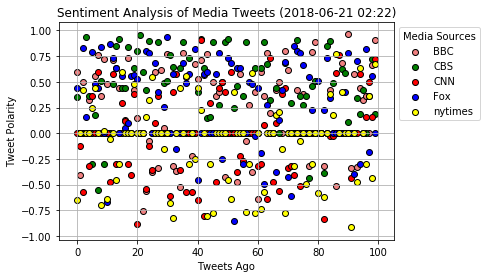

In [20]:
colors = ['lightcoral', 'green', 'red', 'blue', 'yellow']
count = 0

for station in station_feedbacks:
    plt.scatter(station['Tweets Ago'], 
                station['Compound'],
                c=colors[count],
                edgecolor="black", linewidths=1, marker="o",
                alpha=1, label=station['Tweet Source'][0].split('@')[1])

    count += 1

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.grid(True)

plt.legend(loc="upper left", bbox_to_anchor=(1,1), title="Media Sources")

# Saving the img
media_sentiment_plot = f"NewsMood_{str(time.strftime('%m-%d-%y'))}_Sentiment_Scatter_Plot.png"
plt.savefig(media_sentiment_plot, bbox_inches='tight')

plt.show()    

## Sentiment Bar Plot

In [10]:
# Group by tweet source and take the average of the compound
merged_df_gb = merged_df.groupby(['Tweet Source']).mean()['Compound']

av_merged_df = pd.DataFrame(merged_df_gb)

In [11]:
merged_df_gb

Tweet Source
@BBC        0.214503
@CBS        0.349597
@CNN       -0.024451
@Fox        0.269551
@nytimes   -0.069113
Name: Compound, dtype: float64

In [12]:
av_merged_df = av_merged_df.reset_index()

In [13]:
av_merged_df

,Tweet Source,Compound
0,@BBC,0.214503
1,@CBS,0.349597
2,@CNN,-0.024451
3,@Fox,0.269551
4,@nytimes,-0.069113


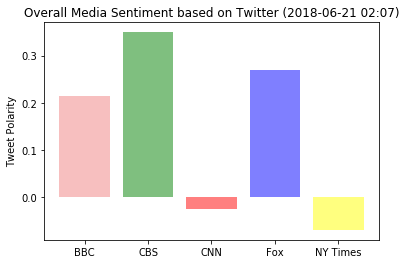

In [14]:
y_axis = av_merged_df['Compound']
#x_axis = av_merged_df['Tweet Source']
x_axis = ["BBC", "CBS", "CNN", "Fox", "NY Times"]

plt.bar(x_axis, y_axis, 
        color=['lightcoral', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="center")

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")

# Saving the img
av_media_sentiment_bar_plot = f"NewsMood_{str(time.strftime('%m-%d-%y'))}_Sentiment_Bar_Plot.png"
plt.savefig(av_media_sentiment_bar_plot)

plt.show() 